## Importing libraries

In [90]:
import pandas as pd
import numpy as np
import matplotlib as plt
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
import plotly.express as px
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_precision_recall_curve
from sklearn.inspection import permutation_importance
from sklearn.impute import KNNImputer
from sklearn.ensemble import RandomForestClassifier


## Reading dataset

In [91]:
df=pd.read_parquet('../data/interim/breasttdataset15v.parquet')

In [92]:
#df=df.drop(["perimeter_se","texture_se"], axis=1)

In [93]:
df.dtypes

radius_worst               float64
concavity_worst            float64
fractal_dimension_worst    float64
texture_worst              float64
smoothness_worst           float64
symmetry_worst             float64
perimeter_se               float64
smoothness_se              float64
texture_se                 float64
fractal_dimension_se       float64
symmetry_se                float64
diagnosis                  float64
symmetry_mean              float64
dtype: object

In [94]:
df['diagnosis']=df["diagnosis"].astype("category")

## Spliting dataset into traing and test

In [95]:
# se toman todas las columnas menos sobreviviente, que es la clase
X = df.drop('diagnosis', axis=1)
# se selecciona la columna de la clase
y = df['diagnosis']
# Split dataset into training set and test set
#random_state generador de numero aleatorios (semilla usada por el generador)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1,shuffle=True) # 70% training and 30% test

In [96]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train,
    test_size=0.25, random_state= 8)

## Scalating variables

In [97]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split # Import train_test_split function

tipificado = StandardScaler().fit(X_train)
standardized_X = tipificado.transform(X_train)
standardized_X_val = tipificado.transform(X_val)

In [98]:
X_train

,radius_worst,concavity_worst,fractal_dimension_worst,texture_worst,smoothness_worst,symmetry_worst,perimeter_se,smoothness_se,texture_se,fractal_dimension_se,symmetry_se,symmetry_mean
288,13.72,0.003581,0.05521,20.98,0.09293,0.2233,2329.0000,0.005783,0.9527,0.001058,0.020430,0.1528
412,18.13,0.166300,0.06469,25.45,0.13380,0.2394,2344.0000,0.007257,1439.0000,0.002001,0.016940,0.1495
340,14.04,0.179100,0.08553,21.08,0.15470,0.2382,1614.0000,0.005910,1042.0000,0.003107,0.012020,0.1543
511,14.99,0.023980,0.05504,25.20,0.09387,0.1565,NaN,0.006883,2188.0000,0.001754,0.007882,0.1565
251,19.26,0.379100,0.08019,26.00,0.15460,0.2837,3094.0000,0.006240,0.7859,0.002461,0.013970,0.1931
...,...,...,...,...,...,...,...,...,...,...,...,...
166,16.89,0.379600,NaN,35.64,0.14710,NaN,1752.0000,0.004088,1005.0000,0.001465,0.013230,0.1761
366,13.61,0.179100,0.07592,19.27,0.12920,NaN,0.7714,0.003681,0.4957,0.001366,0.011290,0.1689
363,13.35,0.142300,0.06306,19.59,0.10960,0.2482,1687.0000,0.005996,0.8355,0.001725,0.020250,0.1667
515,14.08,0.085390,0.07191,12.49,0.14510,NaN,2652.0000,NaN,1014.0000,0.006164,0.025720,0.2403


## Using Knn imputer

In [99]:
imputer = KNNImputer(n_neighbors=5)
X_train_imputed = pd.DataFrame(imputer.fit_transform(X_train),columns = X_train.columns)
X_train_imputed

,radius_worst,concavity_worst,fractal_dimension_worst,texture_worst,smoothness_worst,symmetry_worst,perimeter_se,smoothness_se,texture_se,fractal_dimension_se,symmetry_se,symmetry_mean
0,13.72,0.003581,0.05521,20.98,0.09293,0.22330,2329.0000,0.005783,0.9527,0.001058,0.020430,0.15280
1,18.13,0.166300,0.06469,25.45,0.13380,0.23940,2344.0000,0.007257,1439.0000,0.002001,0.016940,0.14950
2,14.04,0.179100,0.08553,21.08,0.15470,0.23820,1614.0000,0.005910,1042.0000,0.003107,0.012020,0.15430
3,14.99,0.023980,0.05504,25.20,0.09387,0.15650,1690.0140,0.006883,2188.0000,0.001754,0.007882,0.15650
4,19.26,0.379100,0.08019,26.00,0.15460,0.28370,3094.0000,0.006240,0.7859,0.002461,0.013970,0.19310
...,...,...,...,...,...,...,...,...,...,...,...,...
293,16.89,0.379600,0.08786,35.64,0.14710,0.32090,1752.0000,0.004088,1005.0000,0.001465,0.013230,0.17610
294,13.61,0.179100,0.07592,19.27,0.12920,0.24026,0.7714,0.003681,0.4957,0.001366,0.011290,0.16890
295,13.35,0.142300,0.06306,19.59,0.10960,0.24820,1687.0000,0.005996,0.8355,0.001725,0.020250,0.16670
296,14.08,0.085390,0.07191,12.49,0.14510,0.31326,2652.0000,0.006459,1014.0000,0.006164,0.025720,0.24030


In [100]:
matriz_correlacion = X_train_imputed.corr(method='pearson')
matriz_correlacion

,radius_worst,concavity_worst,fractal_dimension_worst,texture_worst,smoothness_worst,symmetry_worst,perimeter_se,smoothness_se,texture_se,fractal_dimension_se,symmetry_se,symmetry_mean
radius_worst,1.000000,0.544073,0.218868,0.274191,0.225103,0.300003,0.486586,-0.221293,-0.132410,0.121157,-0.127624,0.229656
concavity_worst,0.544073,1.000000,0.514732,0.284105,0.442122,0.437351,0.332003,-0.033303,-0.101125,0.378682,-0.113231,0.375778
fractal_dimension_worst,0.218868,0.514732,1.000000,0.153974,0.521000,0.413906,0.102525,0.092314,-0.092831,0.618086,-0.031703,0.288582
texture_worst,0.274191,0.284105,0.153974,1.000000,0.158278,0.144021,0.179264,0.071775,0.419769,0.066468,-0.041089,0.072323
smoothness_worst,0.225103,0.442122,0.521000,0.158278,1.000000,0.451374,0.148271,0.308244,-0.001264,0.275013,-0.018892,0.370400
symmetry_worst,0.300003,0.437351,0.413906,0.144021,0.451374,1.000000,0.207312,-0.082920,-0.145355,0.176167,0.245810,0.595328
perimeter_se,0.486586,0.332003,0.102525,0.179264,0.148271,0.207312,1.000000,0.068220,0.141969,0.170143,0.112529,0.268186
smoothness_se,-0.221293,-0.033303,0.092314,0.071775,0.308244,-0.082920,0.068220,1.000000,0.387023,0.360833,0.340732,0.155407
texture_se,-0.132410,-0.101125,-0.092831,0.419769,-0.001264,-0.145355,0.141969,0.387023,1.000000,0.230070,0.224682,0.107347
fractal_dimension_se,0.121157,0.378682,0.618086,0.066468,0.275013,0.176167,0.170143,0.360833,0.230070,1.000000,0.255436,0.295423


## Heatmap correlation matrix

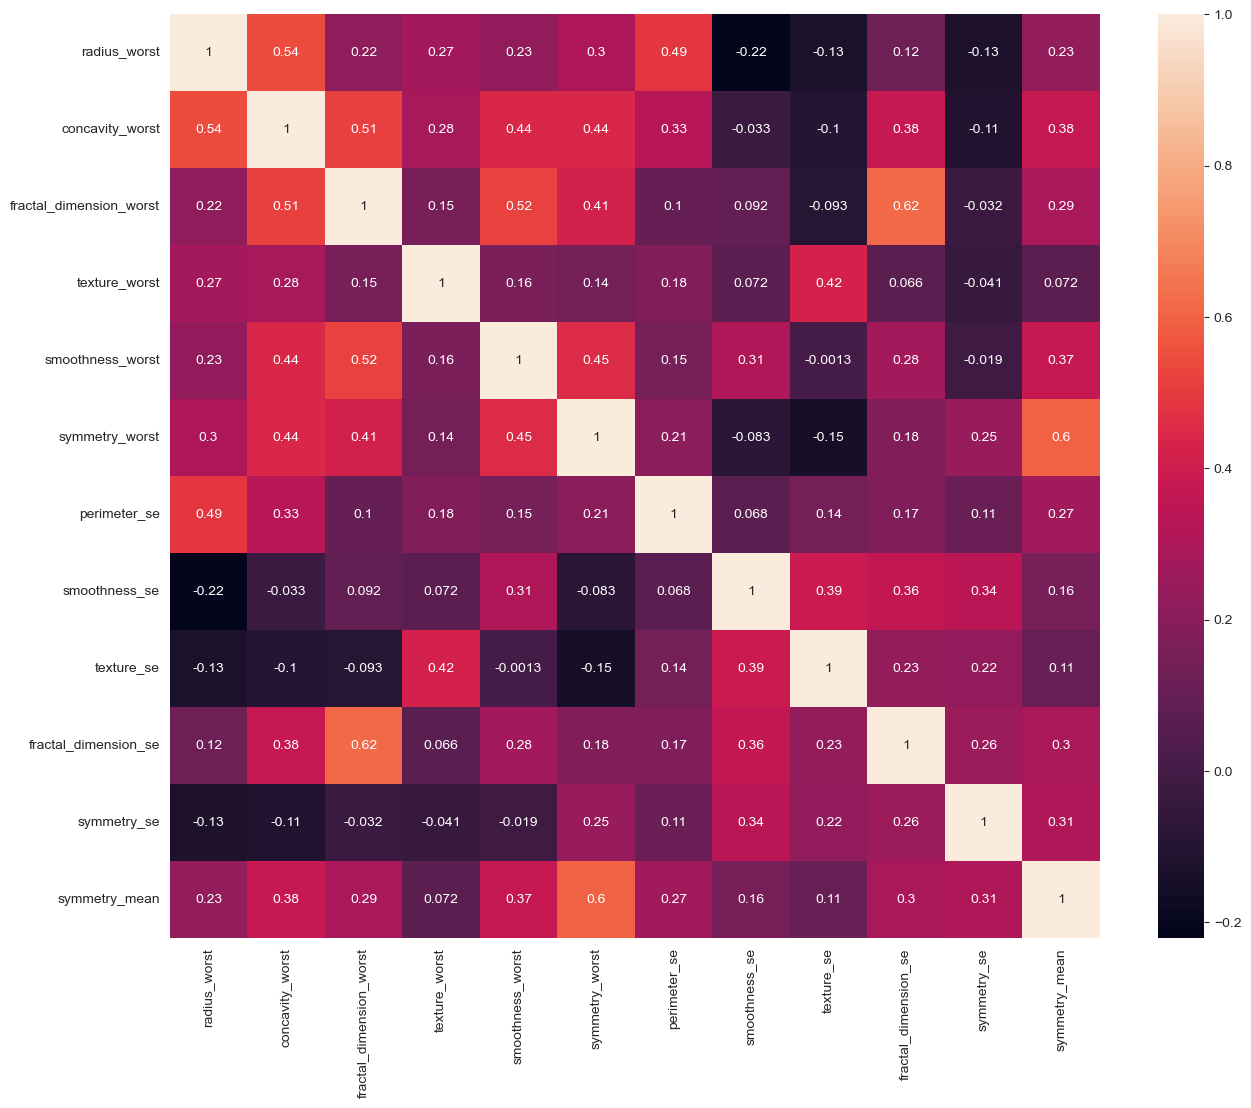

In [101]:
# se construye un mapa de calor a partir de la matriz de correlación
fig, ax = plt.subplots(figsize=(15, 12))
sns.heatmap(matriz_correlacion, annot=True);

## Using standard scaler

In [102]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split # Import train_test_split function

tipificado = StandardScaler().fit(X_train_imputed)
standardized_X = tipificado.transform(X_train_imputed)
standardized_X_val= tipificado.transform(X_val)

In [103]:
imputer = KNNImputer(n_neighbors=5)
X_val_imputed = pd.DataFrame(imputer.fit_transform(X_val),columns = X_val.columns)
X_val_imputed

,radius_worst,concavity_worst,fractal_dimension_worst,texture_worst,smoothness_worst,symmetry_worst,perimeter_se,smoothness_se,texture_se,fractal_dimension_se,symmetry_se,symmetry_mean
0,22.660,0.39120,0.08314,30.93,0.14350,0.30070,4493.0,0.008074,1931.0000,0.004515,0.02383,0.19430
1,10.060,0.46090,0.10550,23.40,0.12210,0.31350,3769.0,0.009845,1911.0000,0.007877,0.03491,0.18198
2,14.800,0.34380,0.07686,27.20,0.14280,0.26660,1513.0,0.005442,1332.0000,0.002464,0.01315,0.18060
3,14.544,0.24560,0.10170,19.62,0.17240,0.29260,1354.0,0.008261,0.5864,0.003806,0.01708,0.16490
4,12.360,0.03582,0.07123,28.92,0.12820,0.29760,1968.0,0.006908,1678.0000,0.002060,0.02694,0.16150
...,...,...,...,...,...,...,...,...,...,...,...,...
95,13.740,0.22410,0.09584,19.93,0.14830,0.27706,1231.0,0.008725,0.7636,0.004726,0.02625,0.17288
96,12.820,0.21020,0.08523,15.97,0.15480,0.30160,1103.0,0.006040,0.4607,0.002206,0.01344,0.16670
97,11.260,0.34860,0.11620,24.39,0.13010,0.26140,3132.0,0.008448,2261.0000,0.006871,0.02682,0.16690
98,12.900,0.02237,0.05932,20.21,0.08409,0.19010,2487.0,0.007357,2.2000,0.002961,0.03433,0.14720


## Testing different models

In [104]:
seed =2
models = []

#logistic Regression
models.append(('LR', LogisticRegression(solver='liblinear')))

# Decision Tree classifier
models.append(('CART', DecisionTreeClassifier()))

# Naïve Bayes
models.append(('NB', GaussianNB()))
# SVM
models.append(('SVM', SVC(C=1.0, kernel='rbf', max_iter=1000, tol=1e-3)))
#Random forest RandomForestClassifier
models.append(('RF', RandomForestClassifier()))
# evaluate each model in turn
results = []
names = []
scoring = 'recall'
for name, model in models:
	# Kfol cross validation for model selection
	kfold = model_selection.KFold(n_splits=10, random_state=seed,shuffle=True)
	#X train , y train
	cv_results = model_selection.cross_val_score(model, X_train_imputed, y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = f"({name}, {cv_results.mean()}, {cv_results.std()}"
	print(msg)

(LR, 0.8272366522366521, 0.08010468868239864
(CART, 0.902624458874459, 0.06164634238189782
(NB, 0.8991522366522366, 0.07866088820521533
(SVM, 0.5198953823953824, 0.20522799259067567
(RF, 0.8863185425685425, 0.07236347015358684


## Comparing algorithms

From the grafic above we can see that RF performs better than other algorithms, so we'll select it for a comparison experiment.

In [105]:
result_df = pd.DataFrame(results, index=names).T
px.box(result_df,title = 'Algorithm Comparison')

In [106]:
#priors calculation
y.value_counts()/len(y)

0.0    0.627417
1.0    0.372583
Name: diagnosis, dtype: float64

In [107]:
a,b = y.value_counts()/len(y)

## Hyperparameter selection

In [108]:
parameters = {
    'n_estimators': [200, 700],
}

grid_search = GridSearchCV(RandomForestClassifier(), parameters, cv=10, return_train_score=True)
grid_search.fit(X_train_imputed, y_train)

grid_search.best_params_

{'n_estimators': 200}

In [109]:
grid_search.best_score_

0.9498850574712643

In [110]:
RF_best = grid_search.best_estimator_

In [111]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [112]:
RF_best.fit(X_train_imputed,y_train)
y_pred = RF_best.predict(X_val_imputed)

## Performance metrics

In [113]:
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96        61
         1.0       1.00      0.87      0.93        39

    accuracy                           0.95       100
   macro avg       0.96      0.94      0.95       100
weighted avg       0.95      0.95      0.95       100



The confusion matrix show a good result by reaching 87% into de recall wich is the one that we have chose  , but it could be improved

C:\Users\CAMARA22\miniconda3\envs\project1\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



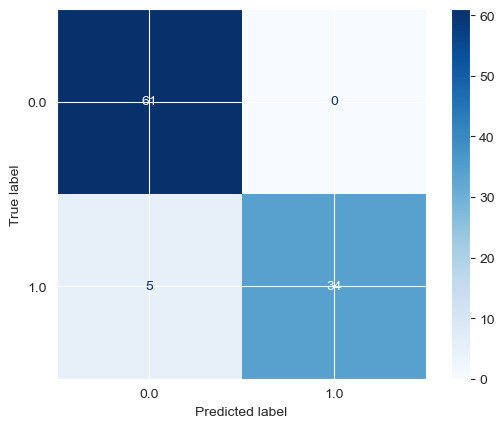

In [114]:
plot_confusion_matrix(RF_best, X_val_imputed, y_val,cmap=plt.cm.Blues);

In [115]:
tn, fp, fn, tp = confusion_matrix(y_val, y_pred).ravel()
sensitivity = tp / (tp+fn)
sensitivity

0.8717948717948718

In [116]:
X_test

,radius_worst,concavity_worst,fractal_dimension_worst,texture_worst,smoothness_worst,symmetry_worst,perimeter_se,smoothness_se,texture_se,fractal_dimension_se,symmetry_se,symmetry_mean
421,13.32,0.195600,0.07987,26.21,0.1358,0.3168,3926.0000,0.009433,1693.0000,0.005061,0.03397,0.1993
47,23.69,0.321500,0.06637,38.25,0.1166,0.2572,5203.0000,0.005769,2463.0000,0.002498,0.01898,0.1752
292,13.86,NaN,0.07834,23.02,0.1172,0.3297,0.9975,0.002887,905.0000,0.001972,0.01870,0.1735
186,18.51,0.402900,0.09438,33.22,NaN,0.2654,4174.0000,0.010520,1506.0000,0.004867,0.02120,0.1647
414,19.96,NaN,0.05737,24.30,0.1243,0.2567,2363.0000,0.007571,828.0000,0.001676,0.01930,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
6,17.39,0.589700,0.09136,23.05,0.1377,0.3318,3.0700,0.009197,0.9857,0.006355,0.02773,0.2151
487,15.98,0.077500,0.06085,25.82,0.1045,0.2646,1286.0000,0.003634,1065.0000,0.001520,0.01924,0.1515
11,14.11,0.170300,0.07609,23.21,0.1176,0.2618,1.7400,0.004854,1025.0000,0.002304,0.01386,NaN
268,NaN,0.344200,0.08218,NaN,0.1401,0.2868,NaN,0.004551,1617.0000,0.002299,0.01367,0.1769


*organizando X_test para evaluarla en el modelo*

## Applying the same procedure to test dataset

In [117]:
tipificado = StandardScaler().fit(X_test)
standardized_X_val= tipificado.transform(X_test)

In [118]:
imputer = KNNImputer(n_neighbors=5)
X_test_imputed = pd.DataFrame(imputer.fit_transform(X_test),columns=X_test.columns)
X_test_imputed

,radius_worst,concavity_worst,fractal_dimension_worst,texture_worst,smoothness_worst,symmetry_worst,perimeter_se,smoothness_se,texture_se,fractal_dimension_se,symmetry_se,symmetry_mean
0,13.320,0.195600,0.07987,26.210,0.13580,0.3168,3926.0000,0.009433,1693.0000,0.005061,0.03397,0.1993
1,23.690,0.321500,0.06637,38.250,0.11660,0.2572,5203.0000,0.005769,2463.0000,0.002498,0.01898,0.1752
2,13.860,0.235680,0.07834,23.020,0.11720,0.3297,0.9975,0.002887,905.0000,0.001972,0.01870,0.1735
3,18.510,0.402900,0.09438,33.220,0.14088,0.2654,4174.0000,0.010520,1506.0000,0.004867,0.02120,0.1647
4,19.960,0.216014,0.05737,24.300,0.12430,0.2567,2363.0000,0.007571,828.0000,0.001676,0.01930,0.1683
...,...,...,...,...,...,...,...,...,...,...,...,...
166,17.390,0.589700,0.09136,23.050,0.13770,0.3318,3.0700,0.009197,0.9857,0.006355,0.02773,0.2151
167,15.980,0.077500,0.06085,25.820,0.10450,0.2646,1286.0000,0.003634,1065.0000,0.001520,0.01924,0.1515
168,14.110,0.170300,0.07609,23.210,0.11760,0.2618,1.7400,0.004854,1025.0000,0.002304,0.01386,0.1791
169,16.244,0.344200,0.08218,27.216,0.14010,0.2868,1484.8460,0.004551,1617.0000,0.002299,0.01367,0.1769


In [119]:
X_test_imputed


,radius_worst,concavity_worst,fractal_dimension_worst,texture_worst,smoothness_worst,symmetry_worst,perimeter_se,smoothness_se,texture_se,fractal_dimension_se,symmetry_se,symmetry_mean
0,13.320,0.195600,0.07987,26.210,0.13580,0.3168,3926.0000,0.009433,1693.0000,0.005061,0.03397,0.1993
1,23.690,0.321500,0.06637,38.250,0.11660,0.2572,5203.0000,0.005769,2463.0000,0.002498,0.01898,0.1752
2,13.860,0.235680,0.07834,23.020,0.11720,0.3297,0.9975,0.002887,905.0000,0.001972,0.01870,0.1735
3,18.510,0.402900,0.09438,33.220,0.14088,0.2654,4174.0000,0.010520,1506.0000,0.004867,0.02120,0.1647
4,19.960,0.216014,0.05737,24.300,0.12430,0.2567,2363.0000,0.007571,828.0000,0.001676,0.01930,0.1683
...,...,...,...,...,...,...,...,...,...,...,...,...
166,17.390,0.589700,0.09136,23.050,0.13770,0.3318,3.0700,0.009197,0.9857,0.006355,0.02773,0.2151
167,15.980,0.077500,0.06085,25.820,0.10450,0.2646,1286.0000,0.003634,1065.0000,0.001520,0.01924,0.1515
168,14.110,0.170300,0.07609,23.210,0.11760,0.2618,1.7400,0.004854,1025.0000,0.002304,0.01386,0.1791
169,16.244,0.344200,0.08218,27.216,0.14010,0.2868,1484.8460,0.004551,1617.0000,0.002299,0.01367,0.1769


In [120]:
RF_best.predict(X_test_imputed)

array([0., 1., 0., 1., 0., 1., 1., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0.,
       1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0., 0., 1., 0.,
       0., 1., 0., 0., 0., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1., 0., 0.,
       0., 0., 0., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 1.,
       1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0., 0., 1., 1., 0., 1., 0.,
       0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 1., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0.,
       0.])

In [121]:
RF_best.fit(X_train_imputed,y_train)
y_pred = RF_best.predict(X_test_imputed)

In [122]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.88      0.99      0.93       105
         1.0       0.98      0.79      0.87        66

    accuracy                           0.91       171
   macro avg       0.93      0.89      0.90       171
weighted avg       0.92      0.91      0.91       171



## Cross validation

In [125]:
# se efectúa validación cruzada
from sklearn import model_selection
kFold = model_selection.KFold(n_splits=10)
scoring = 'accuracy'
puntaje= (model_selection.cross_val_score(RF_best, X_test_imputed, y_test,  scoring = scoring, cv = kFold))
print (f"( {puntaje.mean()}, {puntaje.std()}")

( 0.9470588235294117, 0.0411764705882353


*It seems to be with a model with high accuracy and low deviation between the results of the cross validation *